In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_data = pd.read_csv('datasets/housing.csv')

In [3]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing_data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing_data.shape

(20640, 10)

In [7]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14775,-117.08,32.58,15.0,1462.0,274.0,1002.0,271.0,3.9698,142700.0,NEAR OCEAN
4259,-118.34,34.10,29.0,3193.0,1452.0,2039.0,1265.0,1.8209,500001.0,<1H OCEAN
3590,-118.46,34.24,11.0,5363.0,1160.0,2783.0,1034.0,3.8583,170700.0,<1H OCEAN
14785,-117.12,32.58,34.0,2003.0,466.0,1226.0,443.0,3.0613,136700.0,NEAR OCEAN
2215,-119.84,36.84,12.0,2396.0,290.0,863.0,258.0,8.7716,229200.0,INLAND


In [8]:
housing_data.dropna(inplace=True)

In [9]:
housing_data.shape

(20433, 10)

In [10]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [12]:
housing_data.drop(columns='ocean_proximity', inplace=True)

In [13]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Text(0, 0.5, 'Median house value')

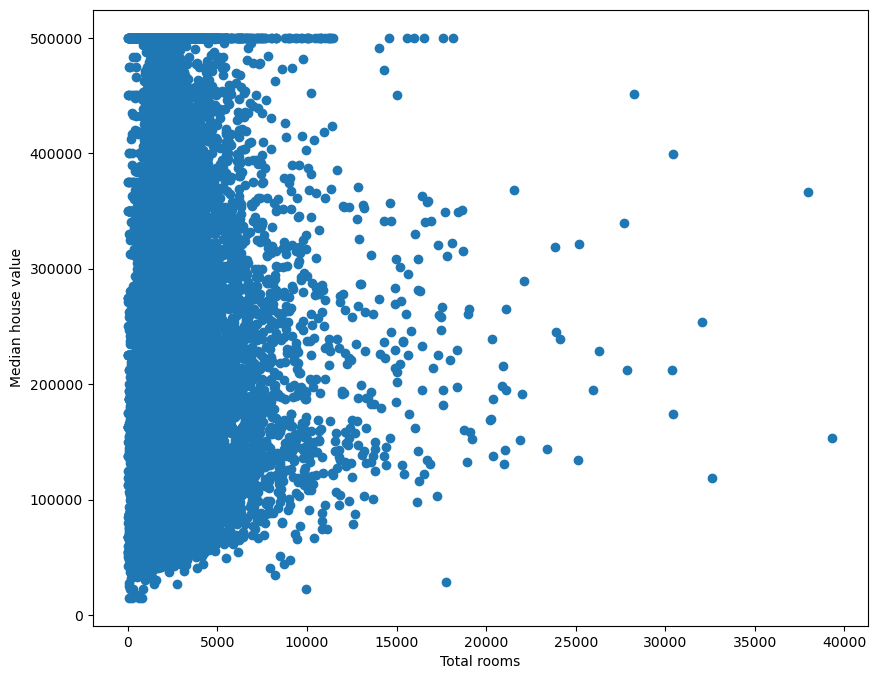

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.scatter(housing_data['total_rooms'], housing_data['median_house_value'])

plt.xlabel('Total rooms')
plt.ylabel('Median house value')

In [15]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

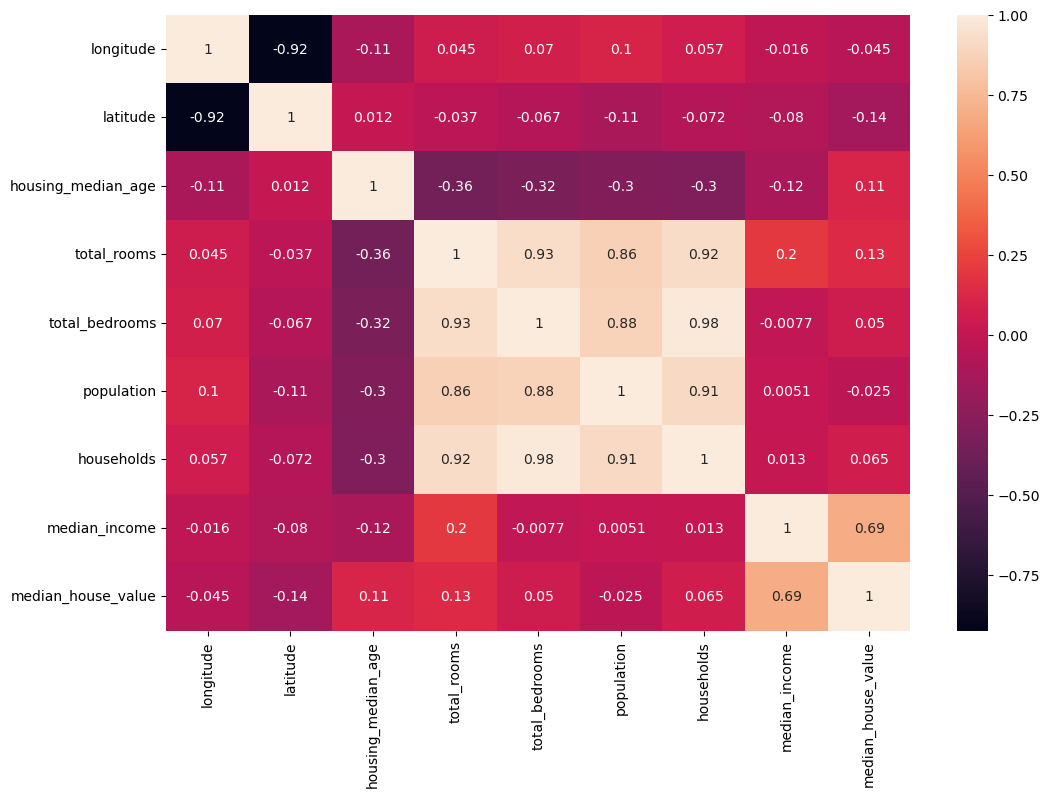

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(housing_data.corr(), annot=True)

#### LINEAR REGRESSION FOR CALIFORNIA HOUSE PRICE PREDICTION

In [17]:
house_data = pd.read_csv('datasets/housing.csv')
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
#remove the rows with missing values
house_data.dropna(inplace=True)
house_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [19]:
house_data.shape

(20433, 10)

In [20]:
house_data['median_house_value'].max()

500001.0

In [21]:
#in the above plot we can see that 500001.0 is the highest value and there are cluster of values

house_data.loc[house_data['median_house_value'] == 500001.0].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [22]:
#we are dropping this skwed datasets

house_data.drop(house_data.loc[house_data['median_house_value'] == 500001.0].index, inplace=True)


In [23]:
### convert categorical to numeric values

house_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [25]:
#use one-hot encoding for categorical variable

house_data = pd.get_dummies(house_data, columns=['ocean_proximity'])
house_data = house_data.astype(int)

In [26]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0


In [27]:
X = house_data.drop('median_house_value', axis=1)
Y = house_data['median_house_value']

In [28]:
# split the data to train and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
#the data will be shuffled


In [29]:
#Linear regression 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
#linear model estimator
#normalize = scales all the numeric features to be between 0 and 1

minmax = MinMaxScaler()
x_train = minmax.fit_transform(x_train)
x_test = minmax.transform(x_test)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)



LinearRegression()

In [30]:
print('Training_score : ', linear_model.score(x_train, y_train))

Training_score :  0.5889155079149528


##### evaluationg how well the model perfomed on the training set.
##### R-quare is a mearure of how well our linear model captures the underlying variation in our training data.
##### for linear regression the training score is R-square, it'll be different for different algo.

In [31]:
predictors = X.columns

In [32]:
#linear regression -> y = wx + c

coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND       -3.616687e+16
ocean_proximity_NEAR BAY     -3.616687e+16
ocean_proximity_<1H OCEAN    -3.616687e+16
ocean_proximity_NEAR OCEAN   -3.616687e+16
ocean_proximity_ISLAND       -3.616687e+16
population                   -1.048091e+06
total_rooms                  -2.253894e+05
longitude                    -7.712128e+04
latitude                     -4.857828e+04
housing_median_age            4.941388e+04
households                    3.651151e+05
total_bedrooms                4.428703e+05
median_income                 5.613222e+05
dtype: float64


* The coef can be considered as a measure of how much the feature contributed in the prediction of price.
* The '-ve' coefficients show that these values tend to lower the price of the house.
* lly, +ve increase price of house.

In [33]:
y_pred = linear_model.predict(x_test)

In [34]:
pred_actual_df = pd.DataFrame({'predicted': y_pred, 'actual': y_test})
pred_actual_df.head(10)

,predicted,actual
4722,256128.0,275000
9596,131912.0,133500
12721,296096.0,280400
4469,213984.0,162100
7781,206128.0,157700
7517,173704.0,113100
14052,210368.0,142300
12376,294408.0,158500
5840,248776.0,352100
19737,86760.0,83900


In [36]:
from sklearn.metrics import r2_score, mean_squared_error

print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.5755024075008415


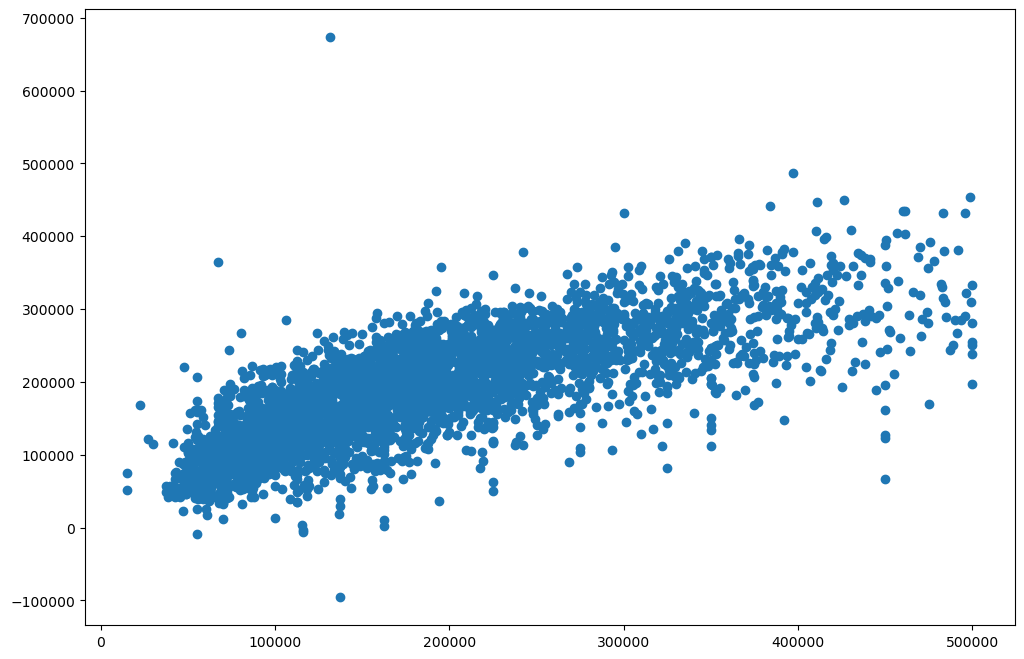

In [40]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(y_test, y_pred)

plt.show()

In [41]:
df_pred_actual_sample = pred_actual_df.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index()

In [42]:
df_pred_actual_sample.head()

,index,predicted,actual
0,17183,387808.0,371800
1,9585,115496.0,130600
2,13447,120992.0,105500
3,10196,230928.0,183100
4,3739,180600.0,240200


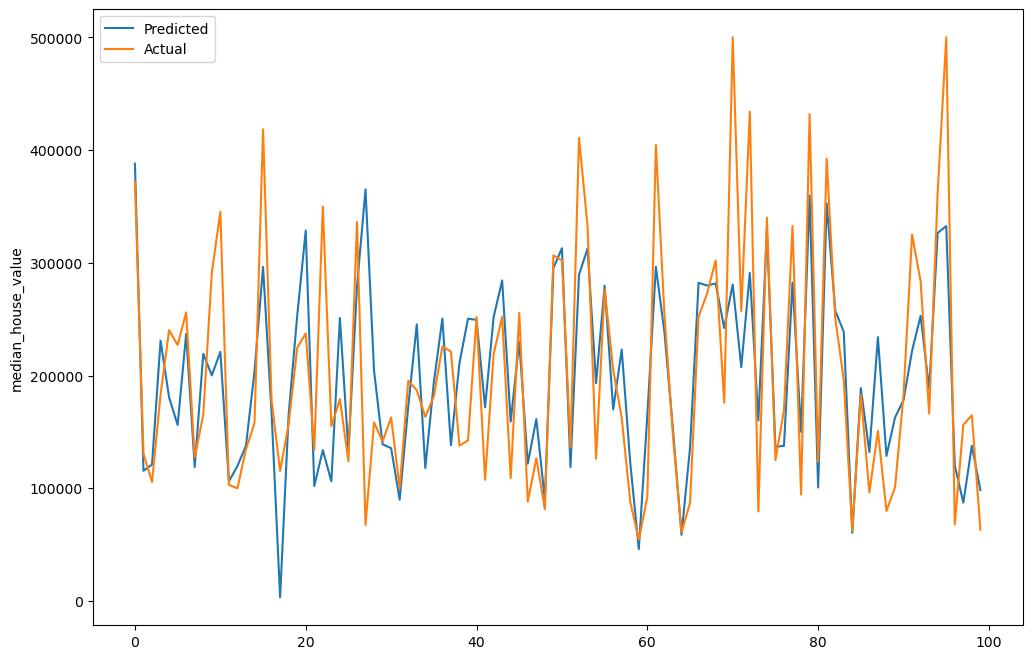

In [44]:
plt.figure(figsize=(12, 8))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')
plt.legend()
plt.show()

### Logistic regression

In [47]:
median = house_data['median_house_value'].median()
median

173800.0

In [48]:
house_data['above_median'] = (house_data['median_house_value'] - median) > 0

In [50]:
house_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,above_median
4339,-118,34,34,479,182,557,170,1,210000,1,0,0,0,0,True
12693,-121,38,16,4429,1124,1538,960,3,190700,0,1,0,0,0,True
17757,-121,37,27,2358,415,1562,383,5,192800,1,0,0,0,0,True
15055,-116,32,24,4055,742,2123,744,4,142000,1,0,0,0,0,False
8726,-118,33,35,1207,207,601,213,4,353400,1,0,0,0,0,True


In [52]:
X = house_data.drop(['median_house_value', 'above_median'], axis = 1)
Y = house_data['above_median']

In [53]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [55]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [56]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [57]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [58]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

# the solver specifies sklean, the algorithm it should use to solve the logistic regression optimization.
# liblinear is good to use when teh datatset is small and of binary classification

In [59]:
print('Training score : ', logistic_model.score(x_train, y_train))

Training score :  0.8171373555840822


In [60]:
y_pred = logistic_model.predict(x_test)

In [64]:
df_pred_actual = pd.DataFrame({'predicted ': y_pred, 'actual ': y_test})
df_pred_actual.head()

,predicted,actual
13039,False,True
20015,False,False
10567,True,False
15170,True,False
3692,False,False


In [63]:
from sklearn.metrics import accuracy_score

print("Testing score : ", accuracy_score(y_test, y_pred))

Testing score :  0.8115532734274711
